In [35]:
# Contact person: Xiaoge
# A very basic recommendation engine

# import all dependencies
import numpy as np
import pandas as pd
from util import *

In [36]:
# this function calculates the cosine similarity 
# between two lists of numbers of the same length
def cosine_similarity(list1, list2):
        dotprod = 0
        betrag_x = 0
        betrag_y = 0
        for i in range(0,len(list1)):
            x=list1[i]
            y=list2[i]
            dotprod+=x*y
            betrag_x+=x*x
            betrag_y+=y*y
        return dotprod/((betrag_x*betrag_y)**(1/2.0)) if betrag_x != 0 and betrag_y != 0 else 0

# this function takes a correlation matrix and a team's fingerprinting metric vector (a row in the dataframe) 
# and returns all recommendations sorted from the highest similarity to the lowest in a list of tuples (recommendation, similarity measure)
def give_recommendation_based_on_correlation_matrix(matrix, fingerprinting_vector):
    cos_sim_list = [{"id":x,"sim":cosine_similarity(matrix[x],fingerprinting_vector)} for x in range(0, len(matrix))]
    cos_sim_list.sort(key = lambda x: x["sim"], reverse=True)
    recommendation = [(recommendations[cos_sim_list[x]["id"]],cos_sim_list[x]["sim"]) for x in range(0, len(cos_sim_list))]
    return recommendation

In [37]:
# this basically generates a dataframe of 150 teams with random numbers between 0 and 1 for
# fingerprinting metrics (assuming that we will normalize all data, 
# 0 = the worst metric level and 1 = the best) 
df = pd.DataFrame(np.random.rand(150,len(fingerprinting_metrics)), columns=fingerprinting_metrics)
df

,Average Throughput Rate,Average Lead Time for User Story,Average Cycle Time for User Story,Average Wait Time for User Story,Amount of WIP,Average Repository Activity,Average Pull Request Size,Build Frequency,Average Time to Fix Broken Build,Average Build Execution Time,...,Average Pull Request Lead Time,Average Code Review Time,Average Pull Request Time to First Review,Average Pull Request Last Review to Merge Time,Pull Request Flow Ratio,Pull Request Engagement,Deployment Volume,Average Deployment Duration,Deployment Failure Rate,Pull Request/Deployment Ratio
0,0.574923,0.725745,0.050459,0.172712,0.026803,0.274164,0.201886,0.804556,0.686389,0.363628,...,0.169938,0.962450,0.922469,0.547964,0.036639,0.382590,0.861744,0.896738,0.197908,0.596621
1,0.727661,0.713890,0.386243,0.657721,0.315420,0.192641,0.205181,0.198642,0.058065,0.160365,...,0.718834,0.393439,0.722394,0.010892,0.008253,0.528624,0.873368,0.100392,0.864494,0.166296
2,0.593588,0.504496,0.252195,0.705565,0.510422,0.230849,0.322661,0.080748,0.226374,0.791877,...,0.271312,0.863461,0.159825,0.942607,0.926917,0.924178,0.008662,0.959028,0.956621,0.770417
3,0.449974,0.124001,0.656019,0.310002,0.987266,0.135009,0.446305,0.538869,0.189853,0.413137,...,0.123579,0.271300,0.864532,0.572471,0.999903,0.559544,0.004322,0.727645,0.738637,0.370485
4,0.310556,0.198234,0.326934,0.898283,0.410202,0.081417,0.604712,0.593683,0.743278,0.870354,...,0.759226,0.002185,0.702057,0.529538,0.114639,0.348937,0.397161,0.516537,0.300639,0.517333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.413979,0.055892,0.024043,0.014149,0.825283,0.037620,0.544399,0.284883,0.788007,0.002673,...,0.282891,0.225169,0.725805,0.698780,0.107446,0.592653,0.524786,0.275652,0.493794,0.006483
146,0.593779,0.709267,0.872546,0.841843,0.206005,0.822106,0.435624,0.979140,0.424918,0.629772,...,0.978464,0.606859,0.444496,0.418097,0.660199,0.699020,0.357389,0.930321,0.503720,0.462906
147,0.414108,0.697287,0.557346,0.402885,0.617268,0.826880,0.725334,0.223712,0.258954,0.953792,...,0.698287,0.068194,0.966684,0.649787,0.219449,0.262308,0.662197,0.095532,0.693687,0.625688
148,0.709943,0.032705,0.762408,0.724573,0.722726,0.878393,0.054726,0.173038,0.047472,0.369997,...,0.950477,0.777346,0.748825,0.171981,0.029478,0.609878,0.070095,0.940509,0.296701,0.343113


In [38]:
# generate a random correlation matrix between each recommendation and each fingerprinting metric
# -1 = negatively correlated -> recommendation should NOT be given for a fingerprinting metric close to 1
# 0 = no correlation -> recommendation has nothing to do with a fingerprinting metric
# 1 = positively correlated -> recommendation should be given for a fingerprinting metric close to 1
matrix = np.matrix([[ np.random.uniform(-1,1) for y in fingerprinting_metrics] for x in recommendations])

# this matrix is shown as a dataframe (prettier)
matrix_df = pd.DataFrame(matrix, index = recommendations, columns = fingerprinting_metrics)

# set correlation to a certain value for certain recommendations
# for x in fingerprinting_metrics:
#     for y in recommendations:
#         matrix_df.loc[y,x]=1 if y == "Take fewer requests in the Product Backlog" else 0

matrix_df

,Average Throughput Rate,Average Lead Time for User Story,Average Cycle Time for User Story,Average Wait Time for User Story,Amount of WIP,Average Repository Activity,Average Pull Request Size,Build Frequency,Average Time to Fix Broken Build,Average Build Execution Time,...,Average Pull Request Lead Time,Average Code Review Time,Average Pull Request Time to First Review,Average Pull Request Last Review to Merge Time,Pull Request Flow Ratio,Pull Request Engagement,Deployment Volume,Average Deployment Duration,Deployment Failure Rate,Pull Request/Deployment Ratio
Finish old user stories first,0.655411,-0.649526,0.433675,-0.492793,0.072475,0.338324,-0.925125,-0.784359,0.519783,0.894017,...,-0.071683,0.284055,-0.648336,-0.415236,-0.275573,0.288940,-0.907273,0.262314,0.233048,0.060746
Refine user stories before adding to backlog,0.442642,-0.139275,0.633331,-0.887049,-0.673970,-0.636641,-0.296609,-0.747991,0.640349,0.900753,...,0.122141,0.173048,0.864082,-0.829890,0.673346,-0.404066,0.213429,0.207523,0.572524,-0.116895
Formulate and estimate user stories better,-0.181897,0.030418,-0.871424,0.767802,-0.001680,0.531360,0.347944,-0.110358,-0.155508,-0.751786,...,0.653842,0.547566,0.831807,-0.478344,-0.901899,-0.614228,-0.446568,0.239963,-0.768389,-0.566371
Check skills/capacity of developers,0.960152,-0.832485,0.880407,-0.525525,0.475951,-0.968205,0.381977,-0.684563,-0.290269,0.934791,...,-0.450925,0.803784,0.954321,-0.420090,0.360795,-0.529062,0.023001,-0.282581,-0.036576,0.189956
plan more developers for the user story,-0.990199,0.594360,0.208995,0.154384,0.710747,-0.310415,-0.184847,0.461581,0.858821,0.818607,...,-0.334764,-0.152250,0.774437,0.956858,0.982738,-0.050631,0.655725,-0.918425,0.540839,0.114619
Refine user stories before adding to backlog,-0.090647,-0.908095,-0.795135,0.120041,-0.349303,0.347487,0.106990,-0.748452,-0.066391,-0.299764,...,0.954010,-0.464073,0.024635,0.649931,0.633196,0.223643,-0.053147,-0.810758,-0.020965,0.627804
Review planning process,0.329511,-0.719758,0.188777,-0.057415,-0.622727,-0.832670,-0.542356,0.938250,-0.613086,0.423998,...,-0.547197,0.115895,0.471715,-0.286757,-0.366337,-0.101507,0.979504,0.406185,0.354951,-0.636401
Take fewer requests in the Product Backlog,-0.557016,0.197235,0.465518,-0.630048,-0.282700,0.855123,0.383468,0.364445,-0.889359,0.341154,...,0.220252,0.222969,-0.850244,-0.111821,0.532035,0.296616,-0.055537,-0.218514,0.850902,0.744614
Check skills/capacity of developers,0.140940,-0.496701,-0.663674,0.479119,0.582850,-0.579597,0.392684,0.453348,0.777222,-0.445994,...,0.537032,-0.996579,0.579716,-0.068104,0.162688,0.379855,0.948554,-0.027384,0.978655,0.707948
plan more developers for the user story,-0.288471,0.834117,-0.489762,0.567635,0.237005,0.956730,-0.921851,0.904257,-0.982498,-0.070321,...,-0.014904,0.215465,0.853844,0.621319,0.082999,0.862895,0.245945,-0.753906,-0.871813,-0.474957


In [39]:
# apply the function to each team
res = [give_recommendation_based_on_correlation_matrix(matrix.tolist(),row.to_list()) for i,row in df.iterrows()]

# put the result in a new column in the dataframe
df["recommended actions"] = res

df

,Average Throughput Rate,Average Lead Time for User Story,Average Cycle Time for User Story,Average Wait Time for User Story,Amount of WIP,Average Repository Activity,Average Pull Request Size,Build Frequency,Average Time to Fix Broken Build,Average Build Execution Time,...,Average Code Review Time,Average Pull Request Time to First Review,Average Pull Request Last Review to Merge Time,Pull Request Flow Ratio,Pull Request Engagement,Deployment Volume,Average Deployment Duration,Deployment Failure Rate,Pull Request/Deployment Ratio,recommended actions
0,0.574923,0.725745,0.050459,0.172712,0.026803,0.274164,0.201886,0.804556,0.686389,0.363628,...,0.962450,0.922469,0.547964,0.036639,0.382590,0.861744,0.896738,0.197908,0.596621,"[(Write more unit tests, 0.3925947560687324), ..."
1,0.727661,0.713890,0.386243,0.657721,0.315420,0.192641,0.205181,0.198642,0.058065,0.160365,...,0.393439,0.722394,0.010892,0.008253,0.528624,0.873368,0.100392,0.864494,0.166296,"[(Increase capacity of the team, 0.45760004450..."
2,0.593588,0.504496,0.252195,0.705565,0.510422,0.230849,0.322661,0.080748,0.226374,0.791877,...,0.863461,0.159825,0.942607,0.926917,0.924178,0.008662,0.959028,0.956621,0.770417,"[(Try to optimize deployment time, 0.348900403..."
3,0.449974,0.124001,0.656019,0.310002,0.987266,0.135009,0.446305,0.538869,0.189853,0.413137,...,0.271300,0.864532,0.572471,0.999903,0.559544,0.004322,0.727645,0.738637,0.370485,"[(Try to optimize deployment time, 0.347850507..."
4,0.310556,0.198234,0.326934,0.898283,0.410202,0.081417,0.604712,0.593683,0.743278,0.870354,...,0.002185,0.702057,0.529538,0.114639,0.348937,0.397161,0.516537,0.300639,0.517333,"[(Try to optimize deployment time, 0.456825144..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.413979,0.055892,0.024043,0.014149,0.825283,0.037620,0.544399,0.284883,0.788007,0.002673,...,0.225169,0.725805,0.698780,0.107446,0.592653,0.524786,0.275652,0.493794,0.006483,"[(Check skills/capacity of developers, 0.46259..."
146,0.593779,0.709267,0.872546,0.841843,0.206005,0.822106,0.435624,0.979140,0.424918,0.629772,...,0.606859,0.444496,0.418097,0.660199,0.699020,0.357389,0.930321,0.503720,0.462906,"[(Increase capacity of the team, 0.45165612038..."
147,0.414108,0.697287,0.557346,0.402885,0.617268,0.826880,0.725334,0.223712,0.258954,0.953792,...,0.068194,0.966684,0.649787,0.219449,0.262308,0.662197,0.095532,0.693687,0.625688,"[(Increase capacity of the team, 0.56190087664..."
148,0.709943,0.032705,0.762408,0.724573,0.722726,0.878393,0.054726,0.173038,0.047472,0.369997,...,0.777346,0.748825,0.171981,0.029478,0.609878,0.070095,0.940509,0.296701,0.343113,[(Investigate impediments against deployment p...


In [40]:
# this is a demonstration of how we could map the fingerprinting metric values to the corresponding metric level

# first generate random metric levels
metrics_level = np.matrix([sorted([np.random.uniform(0,1) for x in range(0,4)]) for x in fingerprinting_metrics])

# show these in a dataframe
metrics_level_df = pd.DataFrame(metrics_level, index = fingerprinting_metrics, columns=["low","medium","high","elite"])

# change the "low" level's value to 0
metrics_level_df['low'] = [0 for x in range(0,len(metrics_level_df))]

# turn dataframe to dictionary for mapping
metrics_level_dict = metrics_level_df.to_dict(orient='index')

# this function finds the corresponding metric level of a metric value for a certain metric
def get_level_of_metric(metric_dict, value):
    lst = [y-value for y in metric_dict.values()]
    for x in range(0,4):
        if lst[x] > 0:
            break
    return list(metric_dict.keys())[x-1]

# coppy the dataframe as we don't want to lose the numbers
df_mapped = df.copy()

# apply the function to each team
for metric in fingerprinting_metrics:
    df_mapped[metric]=df_mapped[metric].map(lambda x: get_level_of_metric(metrics_level_dict.get(metric),x))

df_mapped


,Average Throughput Rate,Average Lead Time for User Story,Average Cycle Time for User Story,Average Wait Time for User Story,Amount of WIP,Average Repository Activity,Average Pull Request Size,Build Frequency,Average Time to Fix Broken Build,Average Build Execution Time,...,Average Code Review Time,Average Pull Request Time to First Review,Average Pull Request Last Review to Merge Time,Pull Request Flow Ratio,Pull Request Engagement,Deployment Volume,Average Deployment Duration,Deployment Failure Rate,Pull Request/Deployment Ratio,recommended actions
0,medium,high,low,low,low,low,low,high,high,high,...,high,high,low,low,low,high,high,low,medium,"[(Write more unit tests, 0.3925947560687324), ..."
1,high,medium,low,low,medium,low,low,low,low,low,...,low,low,low,low,low,high,low,low,low,"[(Increase capacity of the team, 0.45760004450..."
2,medium,low,low,medium,medium,low,low,low,medium,high,...,high,low,high,high,high,low,high,medium,high,"[(Try to optimize deployment time, 0.348900403..."
3,medium,low,low,low,high,low,low,medium,low,high,...,low,high,low,high,low,low,high,low,low,"[(Try to optimize deployment time, 0.347850507..."
4,low,low,low,high,medium,low,low,medium,high,high,...,low,low,low,low,low,medium,high,low,medium,"[(Try to optimize deployment time, 0.456825144..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,low,low,low,low,high,low,low,low,high,low,...,low,low,medium,low,low,medium,medium,low,low,"[(Check skills/capacity of developers, 0.46259..."
146,medium,medium,medium,high,low,high,low,high,medium,high,...,high,low,low,high,low,medium,high,low,medium,"[(Increase capacity of the team, 0.45165612038..."
147,low,medium,low,low,medium,high,low,low,medium,high,...,low,high,low,low,low,medium,low,low,medium,"[(Increase capacity of the team, 0.56190087664..."
148,high,low,low,medium,high,high,low,low,low,high,...,high,low,low,low,low,low,high,low,low,[(Investigate impediments against deployment p...


<AxesSubplot:>

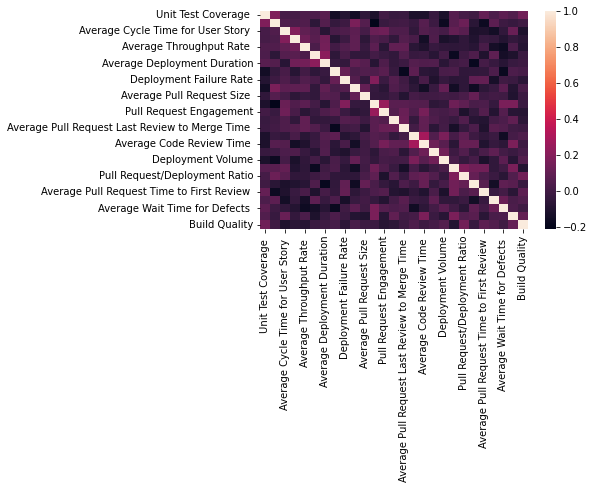

In [50]:

# this is an attempt to cluster the fingerprinting metrics based on their correlation with each other
import scipy.cluster.hierarchy as sch
import seaborn as sns

# this is the clustering function that I copied from stackOverflow (as always :))
def cluster_corr(corr_array, inplace=False):
    """
    Rearranges the correlation matrix, corr_array, so that groups of highly 
    correlated variables are next to eachother 
    
    Parameters
    ----------
    corr_array : pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix 
        
    Returns
    -------
    pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix with the columns and rows rearranged
    """
    pairwise_distances = sch.distance.pdist(corr_array)
    linkage = sch.linkage(pairwise_distances, method='complete')
    cluster_distance_threshold = pairwise_distances.max()/2
    idx_to_cluster_array = sch.fcluster(linkage, cluster_distance_threshold, 
                                        criterion='distance')
    idx = np.argsort(idx_to_cluster_array)
    
    if not inplace:
        corr_array = corr_array.copy()
    
    if isinstance(corr_array, pd.DataFrame):
        return corr_array.iloc[idx, :].T.iloc[idx, :]
    return corr_array[idx, :][:, idx]

# generate correlation dataframe of the fingerprinting metrics
C = df.corr()

# run hierarchical clustering
clustered_corr_matrix = cluster_corr(C, inplace=False)

# generate a heat map of the fingerprinting metrics: here we see very bad result due to the random values
# sns.heatmap(C) # unclustered version
sns.heatmap(clustered_corr_matrix) # clustered version


In [54]:
# assume clustering is completed and 5 clusters are found

# this funciton splits a list into n parts
def split(a, n):
    k, m = divmod(len(a), n)
    return (a[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(n))

cluster_groups_lst = list(split(fingerprinting_metrics, 5))
cluster_groups_lst

# next steps: feature weighting?

[['Average Throughput Rate\xa0',
  'Average Lead Time for User Story\xa0',
  'Average Cycle Time for User Story ',
  'Average Wait Time for User Story\xa0',
  'Amount of WIP ',
  'Average Repository Activity '],
 ['Average Pull Request Size ',
  'Build Frequency\xa0',
  'Average Time to Fix Broken Build ',
  'Average Build Execution Time\xa0',
  'Build Health Factors\xa0',
  'Unit Test Coverage\xa0'],
 ['Build Quality',
  'Average Lead Time for Defects\xa0',
  'Average Cycle Time for Defects ',
  'Average Wait Time for Defects\xa0',
  'Pull Request WIP\xa0'],
 ['Average Pull Request Lead Time\xa0',
  'Average Code Review Time\xa0',
  'Average Pull Request Time to First Review\xa0',
  'Average Pull Request Last Review to Merge Time\xa0',
  'Pull Request Flow Ratio'],
 ['Pull Request Engagement',
  'Deployment Volume',
  'Average Deployment Duration',
  'Deployment Failure Rate',
  'Pull Request/Deployment Ratio']]